In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# Load the data from a CSV file into a pandas dataframe
data=pd.read_csv('/Users/anishreddy/Desktop/basic_updated.csv')

In [30]:
data.shape
data.head()

,patient_id,date_of_birth,medical_condition,co_morbidity,ethnicity,risk_factor,lmp,cycle_length,edd,number_of_babies,...,past_medical_history_11,pastPregnancy_Para,pastPregnancy_living,pastPregnancy_gravida,pastPregnancy_ectopics,pastPregnancy_has risk,pastPregnancy_premature,pastPregnancy_ab_induced,pastPregnancy_ab_spontaneous,pastPregnancy_multiple_births
0,6,30/01/1990,POSTPARTUM,diabetes,Mixed,LOW,1/6/22,28,8/3/23,1,...,NaN,1.0,1.0,1,NaN,No,NaN,NaN,NaN,NaN
1,7,22/10/1986,POSTPARTUM,obesity,Non Hispanic White,LOW,13/07/2021,28,19/04/2022,1,...,NaN,3.0,3.0,4,NaN,No,1.0,NaN,1.0,NaN
2,8,5/7/82,PREGNANCY,obesity,Hispanic and Latino,MEDIUM,23/07/2021,28,29/04/2022,1,...,NaN,0.0,NaN,1,NaN,Yes,NaN,NaN,NaN,NaN
3,9,6/12/83,PREGNANCY,NaN,Non Hispanic White,LOW,20/10/2021,28,27/07/2022,1,...,NaN,0.0,NaN,2,NaN,Yes,NaN,NaN,1.0,NaN
4,13,16/03/1996,POSTPARTUM,obesity,Hispanic and Latino,MEDIUM,30/09/2021,28,7/7/22,1,...,NaN,1.0,1.0,1,NaN,Yes,NaN,NaN,NaN,NaN


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patient_id                     97 non-null     int64  
 1   date_of_birth                  97 non-null     object 
 2   medical_condition              97 non-null     object 
 3   co_morbidity                   57 non-null     object 
 4   ethnicity                      95 non-null     object 
 5   risk_factor                    97 non-null     object 
 6   lmp                            97 non-null     object 
 7   cycle_length                   97 non-null     int64  
 8   edd                            97 non-null     object 
 9   number_of_babies               97 non-null     int64  
 10  other checks                   14 non-null     object 
 11  infection_history              30 non-null     object 
 12  infection_history_1            7 non-null      objec

In [32]:
# One-hot encode the categorical column(s) in the dataframe
df_encoded = pd.get_dummies(data, columns=['medical_condition','co_morbidity','ethnicity','number_of_babies','other checks','infection_history','infection_history_1','past_medical_history','past_medical_history_1','past_medical_history_2','past_medical_history_3','past_medical_history_4','past_medical_history_5','past_medical_history_6','past_medical_history_7','past_medical_history_8','past_medical_history_9','past_medical_history_10','past_medical_history_11'])

# Write the encoded dataframe to a new CSV file
df_encoded.to_csv('/Users/anishreddy/Desktop/output.csv', index=False)

In [33]:
# Load the data from a CSV file into a pandas dataframe
df = pd.read_csv('/Users/anishreddy/Desktop/output.csv')

<Axes: xlabel='risk_factor', ylabel='count'>

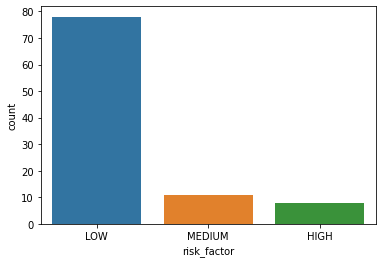

In [34]:
sns.countplot(x="risk_factor", data=df)

In [35]:
df.fillna(0, inplace=True)
df.isnull().sum()

patient_id                                            0
date_of_birth                                         0
risk_factor                                           0
lmp                                                   0
cycle_length                                          0
                                                     ..
past_medical_history_7_other_past_medical_history     0
past_medical_history_8_pulmonary_tb_asthma            0
past_medical_history_9_history_of_abnormal_pap        0
past_medical_history_10_operation_hospitalizations    0
past_medical_history_11_other_past_medical_history    0
Length: 124, dtype: int64

In [36]:
del df['date_of_birth']
del df['lmp']
del df['edd']
df.head()

,patient_id,risk_factor,cycle_length,pastPregnancy_Para,pastPregnancy_living,pastPregnancy_gravida,pastPregnancy_ectopics,pastPregnancy_has risk,pastPregnancy_premature,pastPregnancy_ab_induced,...,past_medical_history_6_drug_allergy_list,past_medical_history_6_operation_hospitalizations,past_medical_history_6_other_past_medical_history,past_medical_history_6_relevant_family_history,past_medical_history_7_neurologic_epilepsy,past_medical_history_7_other_past_medical_history,past_medical_history_8_pulmonary_tb_asthma,past_medical_history_9_history_of_abnormal_pap,past_medical_history_10_operation_hospitalizations,past_medical_history_11_other_past_medical_history
0,6,LOW,28,1.0,1.0,1,0.0,No,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,LOW,28,3.0,3.0,4,0.0,No,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,8,MEDIUM,28,0.0,0.0,1,0.0,Yes,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,9,LOW,28,0.0,0.0,2,0.0,Yes,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,13,MEDIUM,28,1.0,1.0,1,0.0,Yes,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Select the categorical column(s) to encode
cat_cols = ['pastPregnancy_has risk']

# Create a LabelEncoder object and fit it to the categorical data
le = LabelEncoder()
df[cat_cols] = le.fit_transform(df[cat_cols])
#print(df)
cat_cols = ['risk_factor']

# Create a LabelEncoder object and fit it to the categorical data
le = LabelEncoder()
df[cat_cols] = le.fit_transform(df[cat_cols])
print(df)

    patient_id  risk_factor  cycle_length  pastPregnancy_Para  \
0            6            1            28                 1.0   
1            7            1            28                 3.0   
2            8            2            28                 0.0   
3            9            1            28                 0.0   
4           13            2            28                 1.0   
..         ...          ...           ...                 ...   
92         196            1            28                 1.0   
93         197            1            28                 1.0   
94         208            1            28                 1.0   
95         210            1            28                 2.0   
96         211            1            28                 0.0   

    pastPregnancy_living  pastPregnancy_gravida  pastPregnancy_ectopics  \
0                    1.0                      1                     0.0   
1                    3.0                      4                     0

/Users/anishreddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Gestational Diabetes

In [47]:
selected_cols = ['patient_id','risk_factor','medical_condition_MISCARRIAGE','co_morbidity_diabetes','co_morbidity_obesity','past_medical_history_diabetes','past_medical_history_hypertension','past_medical_history_obesity','past_medical_history_1_diabetes','past_medical_history_1_hypertension','past_medical_history_1_infertility','past_medical_history_1_obesity','past_medical_history_2_hypertension','past_medical_history_3_diabetes','past_medical_history_3_hypertension','past_medical_history_4_hypertension','past_medical_history_4_psychiatric']
df1 = df[selected_cols]
train, test = train_test_split(df1, test_size=0.2, random_state=25)
y_test=test['risk_factor']
x_test=test.drop('risk_factor', axis=1)
x_test.head()
x_train=train.drop('risk_factor',axis=1)
y_train=train['risk_factor']
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predict the target variable for the test data
logestic_pred = lr.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, logestic_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':logestic_pred,'Actual Risk':y_test})
print(linear_result)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = tree.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

svc = svm.SVC(kernel='linear')
svc.fit(x_train, y_train)

# Predict the target variable for the test data
svm_pred = svc.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Predict the target variable for the test data
knn_pred = knn.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, knn_pred)
print(f'KNN Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Logistic Regression Accuracy: 0.9
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
71  71               1            1
6    6               2            2
59  59               1            1
86  86               1            1
74  74               1            1
35  35               1            1
0    0               2            1
65  65               1            1
41  41               1            0
46  46               1            1
94  94               1            1
88  88               1            1
78  78               1            1
58  58               1            1
29  29               1            1
51  51               1            1
Decision Tree Accuracy: 0.9
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
71

/Users/anishreddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Pre-Eclampsia

In [40]:
selected_cols = ['patient_id','risk_factor','medical_condition_MISCARRIAGE','co_morbidity_diabetes','co_morbidity_obesity','past_medical_history_diabetes','past_medical_history_hypertension','past_medical_history_obesity','past_medical_history_thyroid','past_medical_history_1_diabetes','past_medical_history_1_hypertension','past_medical_history_1_obesity','past_medical_history_1_thyroid','past_medical_history_2_hypertension','past_medical_history_2_relevant_family_history','past_medical_history_3_diabetes','past_medical_history_3_hypertension','past_medical_history_3_neurologic_epilepsy','past_medical_history_4_hypertension','past_medical_history_4_kidney_disease_uti','past_medical_history_7_neurologic_epilepsy']
df1 = df[selected_cols]
train, test = train_test_split(df1, test_size=0.2, random_state=25)
y_test=test['risk_factor']
x_test=test.drop('risk_factor', axis=1)
x_test.head()
x_train=train.drop('risk_factor',axis=1)
y_train=train['risk_factor']
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predict the target variable for the test data
logestic_pred = lr.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, logestic_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':logestic_pred,'Actual Risk':y_test})
print(linear_result)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = tree.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

svc = svm.SVC(kernel='linear')
svc.fit(x_train, y_train)

# Predict the target variable for the test data
svm_pred = svc.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Predict the target variable for the test data
knn_pred = knn.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, knn_pred)
print(f'KNN Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Logistic Regression Accuracy: 0.9
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
71  71               1            1
6    6               2            2
59  59               1            1
86  86               1            1
74  74               1            1
35  35               1            1
0    0               2            1
65  65               1            1
41  41               1            0
46  46               1            1
94  94               1            1
88  88               1            1
78  78               1            1
58  58               1            1
29  29               1            1
51  51               1            1
Decision Tree Accuracy: 0.9
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
71

# Pre-term

In [46]:
selected_cols = ['patient_id','risk_factor','medical_condition_MISCARRIAGE','pastPregnancy_premature','past_medical_history_alcohol','past_medical_history_gyn_surgery','past_medical_history_psychiatric','past_medical_history_thyroid','past_medical_history_tobacco','past_medical_history_1_gyn_surgery','past_medical_history_1_psychiatric','past_medical_history_1_pulmonary_tb_asthma','past_medical_history_1_street_drugs','past_medical_history_1_thyroid','past_medical_history_1_tobacco','past_medical_history_2_gyn_surgery','past_medical_history_2_psychiatric','past_medical_history_2_pulmonary_tb_asthma','past_medical_history_2_street_drugs','past_medical_history_2_tobacco','past_medical_history_3_neurologic_epilepsy','past_medical_history_3_psychiatric','past_medical_history_3_pulmonary_tb_asthma','past_medical_history_3_street_drugs','past_medical_history_4_psychiatric','past_medical_history_4_pulmonary_tb_asthma','past_medical_history_5_street_drugs','past_medical_history_7_neurologic_epilepsy','past_medical_history_8_pulmonary_tb_asthma']
df1 = df[selected_cols]
train, test = train_test_split(df1, test_size=0.2, random_state=25)
y_test=test['risk_factor']
x_test=test.drop('risk_factor', axis=1)
x_test.head()
x_train=train.drop('risk_factor',axis=1)
y_train=train['risk_factor']
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predict the target variable for the test data
logestic_pred = lr.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, logestic_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':logestic_pred,'Actual Risk':y_test})
print(linear_result)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = tree.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

svc = svm.SVC(kernel='linear')
svc.fit(x_train, y_train)

# Predict the target variable for the test data
svm_pred = svc.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Predict the target variable for the test data
knn_pred = knn.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, knn_pred)
print(f'KNN Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Logistic Regression Accuracy: 0.9
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
71  71               1            1
6    6               2            2
59  59               1            1
86  86               1            1
74  74               1            1
35  35               1            1
0    0               2            1
65  65               1            1
41  41               1            0
46  46               1            1
94  94               1            1
88  88               1            1
78  78               1            1
58  58               1            1
29  29               1            1
51  51               1            1
Decision Tree Accuracy: 0.9
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               2            1
95  95               1            1
71

/Users/anishreddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# C-Section

In [45]:
selected_cols = ['patient_id','risk_factor','co_morbidity_diabetes','past_medical_history_diabetes','past_medical_history_1_diabetes','past_medical_history_1_infertility','past_medical_history_2_history_of_blood_transfs','past_medical_history_2_uterine_anomaly','past_medical_history_3_advanced_maternal_age','past_medical_history_allergies','past_medical_history_history_of_blood_transfs','past_medical_history_1_allergies','past_medical_history_1_relevant_family_history']
df1 = df[selected_cols]
train, test = train_test_split(df1, test_size=0.2, random_state=25)
y_test=test['risk_factor']
x_test=test.drop('risk_factor', axis=1)
x_test.head()
x_train=train.drop('risk_factor',axis=1)
y_train=train['risk_factor']
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predict the target variable for the test data
logestic_pred = lr.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, logestic_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':logestic_pred,'Actual Risk':y_test})
print(linear_result)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = tree.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

svc = svm.SVC(kernel='linear')
svc.fit(x_train, y_train)

# Predict the target variable for the test data
svm_pred = svc.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Predict the target variable for the test data
knn_pred = knn.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, knn_pred)
print(f'KNN Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Logistic Regression Accuracy: 0.9
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
71  71               1            1
6    6               2            2
59  59               1            1
86  86               1            1
74  74               1            1
35  35               1            1
0    0               2            1
65  65               1            1
41  41               1            0
46  46               1            1
94  94               1            1
88  88               1            1
78  78               1            1
58  58               1            1
29  29               1            1
51  51               1            1
Decision Tree Accuracy: 0.95
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
7

# Ideal weight

In [21]:
selected_cols = ['patient_id','risk_factor','medical_condition_MISCARRIAGE','pastPregnancy_has risk','co_morbidity_diabetes','co_morbidity_obesity','past_medical_history_diabetes','past_medical_history_obesity','past_medical_history_thyroid','past_medical_history_1_diabetes','past_medical_history_1_obesity','past_medical_history_1_thyroid','past_medical_history_2_hepatitis_liver_disease','past_medical_history_3_diabetes','past_medical_history_3_heart_disease','past_medical_history_4_hepatitis_liver_disease','past_medical_history_4_kidney_disease_uti','past_medical_history_5_heart_disease']
df1 = df[selected_cols]
train, test = train_test_split(df1, test_size=0.2, random_state=25)
y_test=test['risk_factor']
x_test=test.drop('risk_factor', axis=1)
x_test.head()
x_train=train.drop('risk_factor',axis=1)
y_train=train['risk_factor']
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predict the target variable for the test data
logestic_pred = lr.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, logestic_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':logestic_pred,'Actual Risk':y_test})
print(linear_result)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = tree.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

svc = svm.SVC(kernel='linear')
svc.fit(x_train, y_train)

# Predict the target variable for the test data
svm_pred = svc.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Predict the target variable for the test data
knn_pred = knn.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, knn_pred)
print(f'KNN Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Logistic Regression Accuracy: 0.9
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
71  71               1            1
6    6               2            2
59  59               1            1
86  86               1            1
74  74               1            1
35  35               1            1
0    0               2            1
65  65               1            1
41  41               1            0
46  46               1            1
94  94               1            1
88  88               1            1
78  78               1            1
58  58               1            1
29  29               1            1
51  51               1            1
Decision Tree Accuracy: 0.95
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
7

/Users/anishreddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
